# Studi Analisis Empiris dan PCA terhadap Dataset Penyakit Kronis Menggunakan KNN

Studi ini bertujuan untuk menganalisis dataset penyakit ginjal kronis (CKD) secara empiris, melakukan reduksi dimensi dengan PCA, dan membandingkan performa KNN sebelum dan sesudah PCA.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

### Persiapan Data

In [2]:
# Load dataset CKD (ganti dengan path file Anda)
data = pd.read_csv("kidney_disease.csv")

# Penanganan missing values
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)

# Encoding kategorikal
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# Standarisasi
scaler = StandardScaler()
X = scaler.fit_transform(data.drop('classification', axis=1))
y = data['classification']

# Tampilkan 5 baris pertama
data.head()

/tmp/ipykernel_10197/651665741.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
/tmp/ipykernel_10197/651665741.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,32,72,34,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,26,56,34,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,34,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,3,1,0,0,0,0


### Analisis Empiris

               id         age          bp          sg          al          su  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   16.974966   13.476298    0.005369    1.272318    1.029487   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.015000    0.000000    0.000000   
50%    199.500000   54.000000   78.234536    1.017408    1.000000    0.000000   
75%    299.250000   64.000000   80.000000    1.020000    2.000000    0.450142   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              rbc          pc         pcc          ba  ...         pcv  \
count  400.000000  400.000000  400.000000  400.000000  ...  400.000000   
mean     0.882500    0.810000    0.105000    0.055000  ...   27.227500   
std      0.322418    0.392792    0.306937    0.2

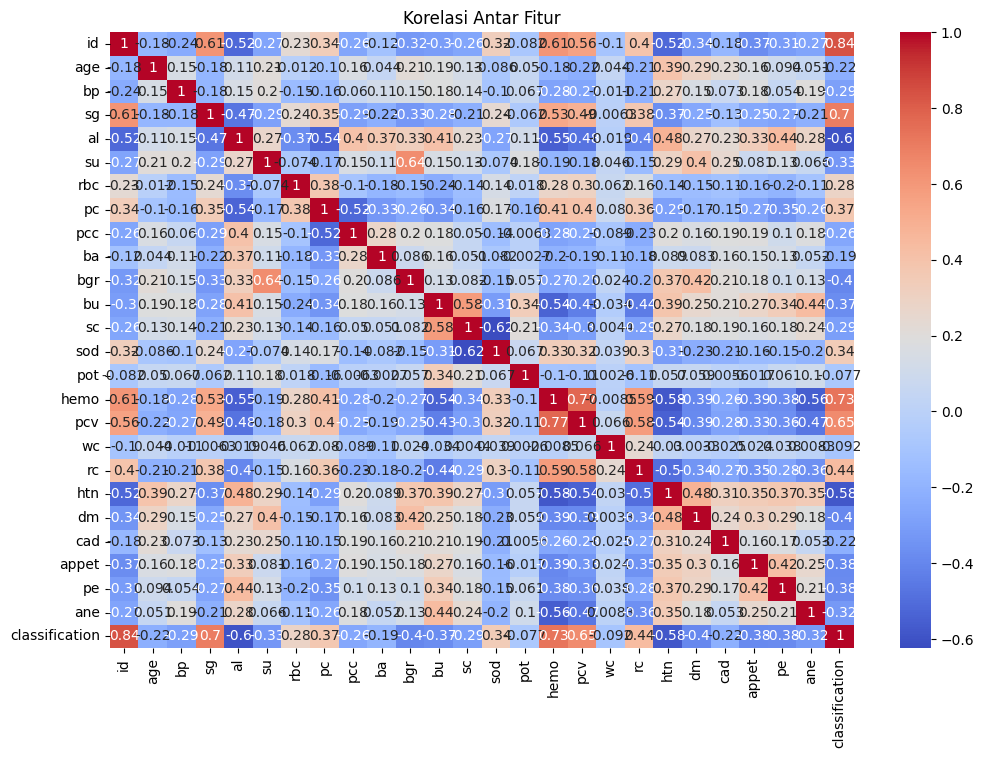

In [3]:
# Statistik deskriptif
print(data.describe())

# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur")
plt.show()

### PCA

Explained Variance Ratio: [0.28915425 0.07150504 0.06680785 0.05253546 0.049486   0.04618191
 0.04343485 0.03918525 0.03741358 0.03313848 0.03196303 0.03132426
 0.02717358 0.02380046 0.02258579 0.02016996 0.01829853 0.01734306
 0.01377951 0.01359684 0.01260067]
Jumlah Komponen: 21


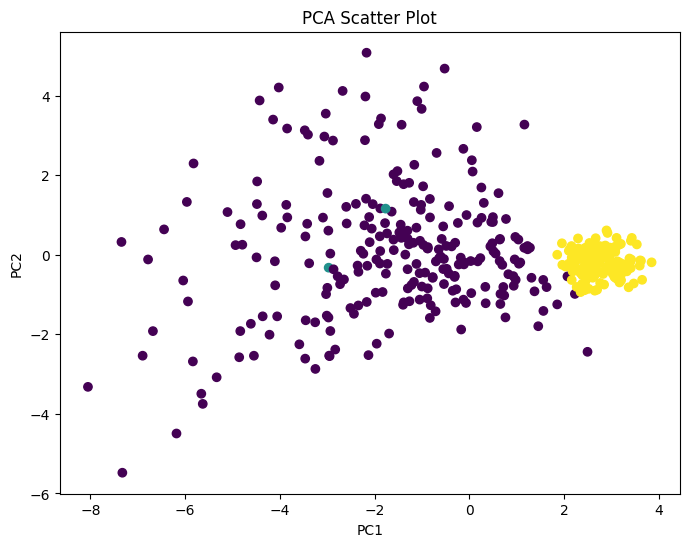

In [4]:
# PCA
pca = PCA(n_components=0.95)  # Pertahankan 95% variansi
X_pca = pca.fit_transform(X)

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Jumlah Komponen:", pca.n_components_)

# Scatter plot PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()

### KNN

Akurasi Data Asli: 0.9875
Akurasi Data PCA: 0.9875


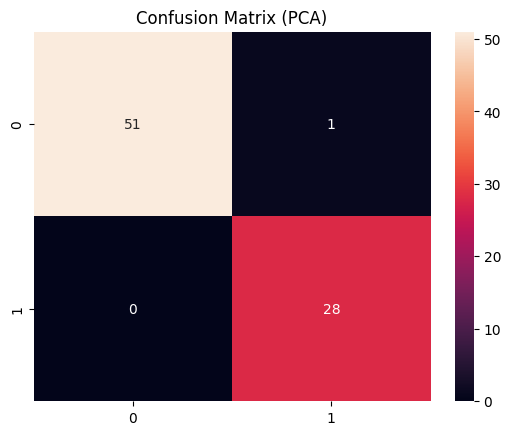

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# KNN pada data asli
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Akurasi Data Asli:", accuracy_score(y_test, y_pred))

# KNN pada data PCA
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(X_test_pca)
print("Akurasi Data PCA:", accuracy_score(y_test_pca, y_pred_pca))

# Confusion matrix
cm = confusion_matrix(y_test_pca, y_pred_pca)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix (PCA)")
plt.show()

## Kesimpulan
Berdasarkan analisis, PCA berhasil mengurangi dimensi dataset CKD sambil mempertahankan sebagian besar variansi. Performa KNN setelah PCA menunjukkan hasil yang kompetitif dibandingkan dengan data asli, dengan waktu komputasi yang lebih efisien.